[View in Colaboratory](https://colab.research.google.com/github/HUSTneeb/GoogleColabCode/blob/master/TensorFlowLearning4.ipynb)

In [36]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.11.0


In [0]:
NUM_WORDS=10000

(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  results=np.zeros((len(sequences),dimension))
  for i,word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
    
  return results

train_data=multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)

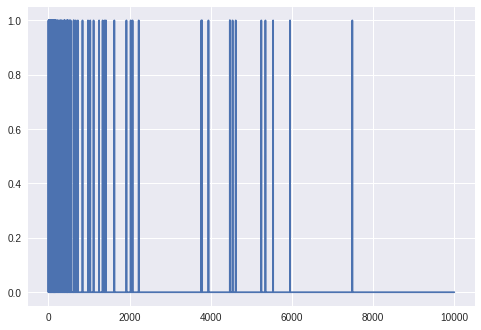

In [38]:
plt.plot(train_data[0])

In [39]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [40]:
baseline_history=baseline_model.fit(train_data,train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data,test_labels),
                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4903 - acc: 0.7939 - binary_crossentropy: 0.4903 - val_loss: 0.3371 - val_acc: 0.8757 - val_binary_crossentropy: 0.3371
Epoch 2/20
 - 4s - loss: 0.2482 - acc: 0.9121 - binary_crossentropy: 0.2482 - val_loss: 0.2848 - val_acc: 0.8868 - val_binary_crossentropy: 0.2848
Epoch 3/20
 - 4s - loss: 0.1814 - acc: 0.9371 - binary_crossentropy: 0.1814 - val_loss: 0.2908 - val_acc: 0.8850 - val_binary_crossentropy: 0.2908
Epoch 4/20
 - 4s - loss: 0.1447 - acc: 0.9507 - binary_crossentropy: 0.1447 - val_loss: 0.3170 - val_acc: 0.8789 - val_binary_crossentropy: 0.3170
Epoch 5/20
 - 4s - loss: 0.1201 - acc: 0.9600 - binary_crossentropy: 0.1201 - val_loss: 0.3448 - val_acc: 0.8734 - val_binary_crossentropy: 0.3448
Epoch 6/20
 - 4s - loss: 0.0989 - acc: 0.9691 - binary_crossentropy: 0.0989 - val_loss: 0.3769 - val_acc: 0.8698 - val_binary_crossentropy: 0.3769
Epoch 7/20
 - 4s - loss: 0.0821 - acc: 0.9754 - binary_crossentropy:

In [41]:
smaller_model=keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [42]:
smaller_history=smaller_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6257 - acc: 0.6413 - binary_crossentropy: 0.6257 - val_loss: 0.5593 - val_acc: 0.7647 - val_binary_crossentropy: 0.5593
Epoch 2/20
 - 4s - loss: 0.5008 - acc: 0.8365 - binary_crossentropy: 0.5008 - val_loss: 0.4887 - val_acc: 0.8373 - val_binary_crossentropy: 0.4887
Epoch 3/20
 - 4s - loss: 0.4310 - acc: 0.8914 - binary_crossentropy: 0.4310 - val_loss: 0.4441 - val_acc: 0.8718 - val_binary_crossentropy: 0.4441
Epoch 4/20
 - 4s - loss: 0.3742 - acc: 0.9218 - binary_crossentropy: 0.3742 - val_loss: 0.4078 - val_acc: 0.8815 - val_binary_crossentropy: 0.4078
Epoch 5/20
 - 4s - loss: 0.3089 - acc: 0.9398 - binary_crossentropy: 0.3089 - val_loss: 0.3483 - val_acc: 0.8852 - val_binary_crossentropy: 0.3483
Epoch 6/20
 - 4s - loss: 0.2024 - acc: 0.9501 - binary_crossentropy: 0.2024 - val_loss: 0.2942 - val_acc: 0.8829 - val_binary_crossentropy: 0.2942
Epoch 7/20
 - 4s - loss: 0.1506 - acc: 0.9571 - binary_crossentropy:

In [43]:
bigger_model=keras.models.Sequential([
    keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [44]:
bigger_history=bigger_model.fit(train_data,train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.3401 - acc: 0.8570 - binary_crossentropy: 0.3401 - val_loss: 0.2945 - val_acc: 0.8792 - val_binary_crossentropy: 0.2945
Epoch 2/20
 - 18s - loss: 0.1321 - acc: 0.9526 - binary_crossentropy: 0.1321 - val_loss: 0.3562 - val_acc: 0.8631 - val_binary_crossentropy: 0.3562
Epoch 3/20
 - 19s - loss: 0.0372 - acc: 0.9896 - binary_crossentropy: 0.0372 - val_loss: 0.4450 - val_acc: 0.8690 - val_binary_crossentropy: 0.4450
Epoch 4/20
 - 19s - loss: 0.0056 - acc: 0.9993 - binary_crossentropy: 0.0056 - val_loss: 0.5931 - val_acc: 0.8716 - val_binary_crossentropy: 0.5931
Epoch 5/20
 - 18s - loss: 6.1415e-04 - acc: 1.0000 - binary_crossentropy: 6.1415e-04 - val_loss: 0.6675 - val_acc: 0.8715 - val_binary_crossentropy: 0.6675
Epoch 6/20
 - 18s - loss: 2.2105e-04 - acc: 1.0000 - binary_crossentropy: 2.2105e-04 - val_loss: 0.7059 - val_acc: 0.8716 - val_binary_crossentropy: 0.7059
Epoch 7/20
 - 18s - loss: 1.3198e-04 - acc: 1.

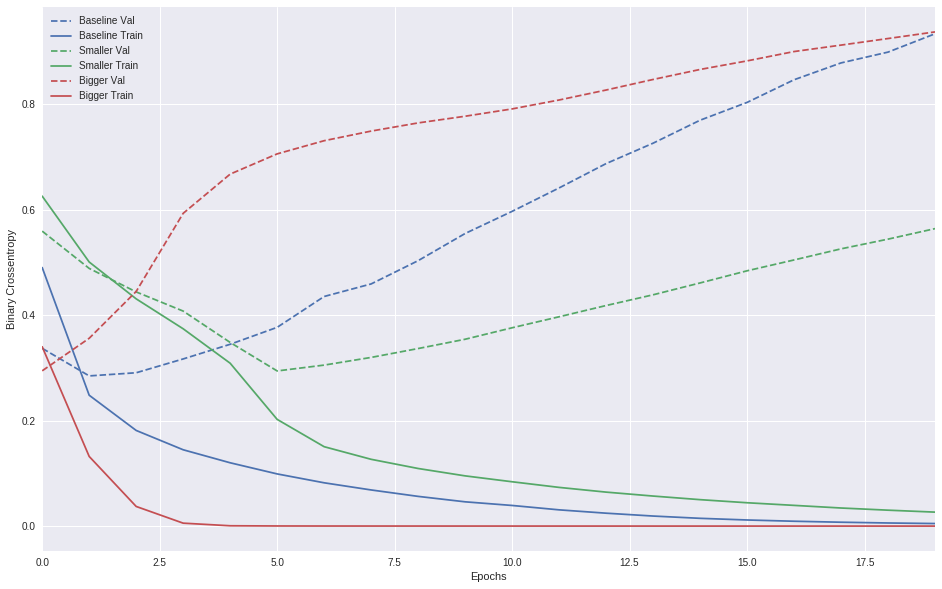

In [45]:
def plot_history(histories,key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val=plt.plot(history.epoch,history.history['val_'+key],
                '--',label=name.title()+' Val')
    plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
            label=name.title()+' Train')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  
  plt.xlim([0,max(history.epoch)])
  
plot_history([('baseline',baseline_history),
             ('smaller',smaller_history),
             ('bigger',bigger_history)
             ])

In [46]:
print(smaller_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_binary_crossentropy', 'loss', 'acc', 'binary_crossentropy'])


In [47]:
l2_model=keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

l2_model_history=l2_model.fit(train_data,
                              train_labels,
                              epochs=20,
                              batch_size=512,
                              validation_data=(test_data,test_labels),
                              verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5612 - acc: 0.7970 - binary_crossentropy: 0.5251 - val_loss: 0.4154 - val_acc: 0.8689 - val_binary_crossentropy: 0.3772
Epoch 2/20
 - 4s - loss: 0.3307 - acc: 0.9008 - binary_crossentropy: 0.2867 - val_loss: 0.3407 - val_acc: 0.8869 - val_binary_crossentropy: 0.2924
Epoch 3/20
 - 4s - loss: 0.2705 - acc: 0.9217 - binary_crossentropy: 0.2194 - val_loss: 0.3350 - val_acc: 0.8870 - val_binary_crossentropy: 0.2817
Epoch 4/20
 - 4s - loss: 0.2426 - acc: 0.9352 - binary_crossentropy: 0.1876 - val_loss: 0.3416 - val_acc: 0.8858 - val_binary_crossentropy: 0.2855
Epoch 5/20
 - 4s - loss: 0.2266 - acc: 0.9412 - binary_crossentropy: 0.1689 - val_loss: 0.3550 - val_acc: 0.8811 - val_binary_crossentropy: 0.2964
Epoch 6/20
 - 4s - loss: 0.2127 - acc: 0.9482 - binary_crossentropy: 0.1534 - val_loss: 0.3665 - val_acc: 0.8786 - val_binary_crossentropy: 0.3067
Epoch 7/20
 - 4s - loss: 0.2045 - acc: 0.9519 - binary_crossentropy:

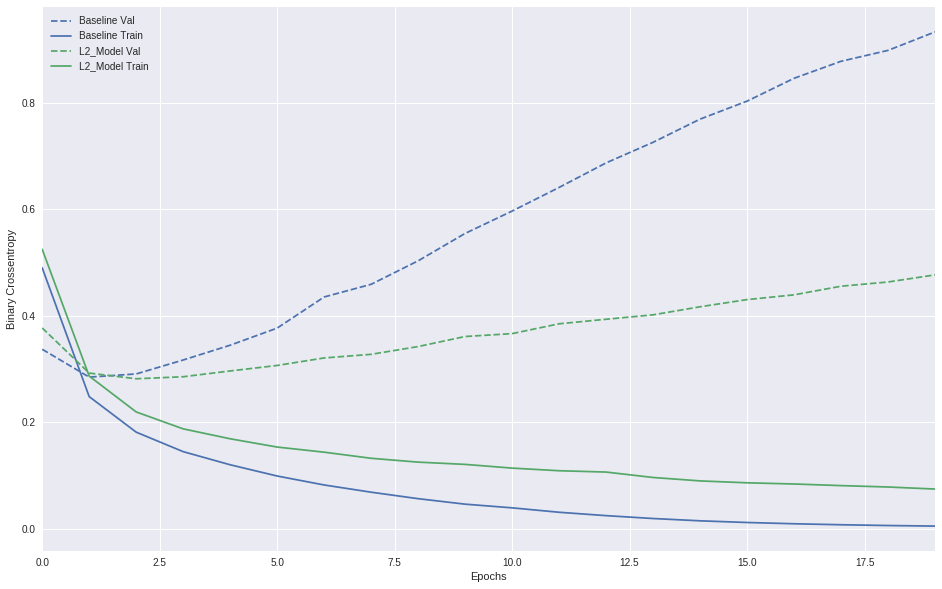

In [48]:
plot_history([('baseline',baseline_history),
              ('l2_model',l2_model_history)])

In [49]:
dpt_model=keras.models.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history=dpt_model.fit(train_data,train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=[test_data,test_labels],
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6498 - acc: 0.6096 - binary_crossentropy: 0.6498 - val_loss: 0.5487 - val_acc: 0.8402 - val_binary_crossentropy: 0.5487
Epoch 2/20
 - 4s - loss: 0.5055 - acc: 0.7646 - binary_crossentropy: 0.5055 - val_loss: 0.3702 - val_acc: 0.8795 - val_binary_crossentropy: 0.3702
Epoch 3/20
 - 4s - loss: 0.3857 - acc: 0.8494 - binary_crossentropy: 0.3857 - val_loss: 0.3007 - val_acc: 0.8882 - val_binary_crossentropy: 0.3007
Epoch 4/20
 - 4s - loss: 0.3195 - acc: 0.8824 - binary_crossentropy: 0.3195 - val_loss: 0.2770 - val_acc: 0.8896 - val_binary_crossentropy: 0.2770
Epoch 5/20
 - 4s - loss: 0.2694 - acc: 0.9024 - binary_crossentropy: 0.2694 - val_loss: 0.2728 - val_acc: 0.8888 - val_binary_crossentropy: 0.2728
Epoch 6/20
 - 4s - loss: 0.2330 - acc: 0.9182 - binary_crossentropy: 0.2330 - val_loss: 0.2864 - val_acc: 0.8866 - val_binary_crossentropy: 0.2864
Epoch 7/20
 - 4s - loss: 0.2110 - acc: 0.9268 - binary_crossentropy:

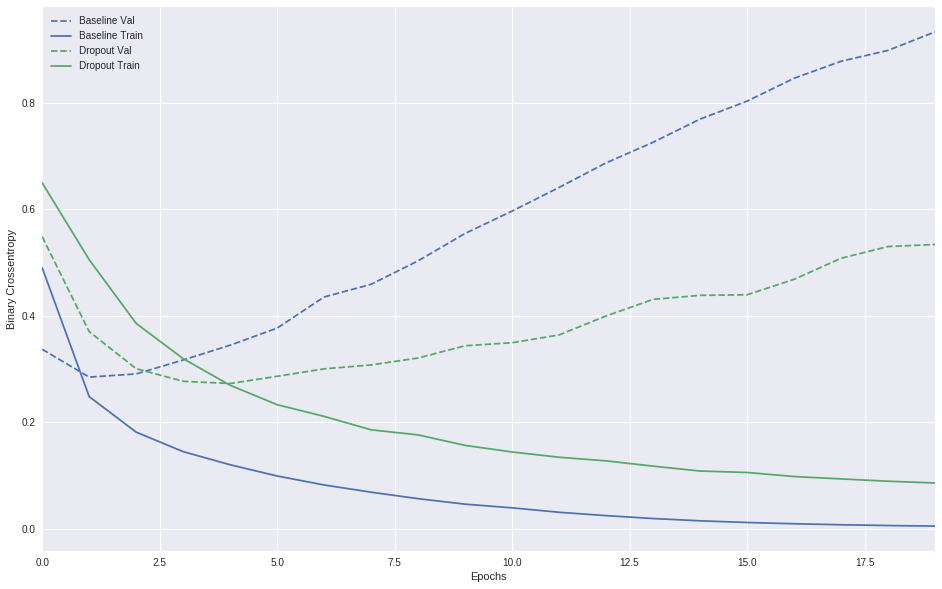

In [51]:
plot_history([('baseline',baseline_history),
             ('dropout',dpt_model_history)])